<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/0523_%EC%84%B8%EC%85%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. 추천시스템

### 08. 파이썬 추천시스템 패키지 - Surprise

#### **Surprise 패키지 소개**

파이썬 기반 추천시스템 구축을 위한 전용 패키지로, 사이킷런과 유사한 API와 프레임워크를 제공

In [2]:
!pip install scikit-surprise

<Surprise 패키지의 장점>
- 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천시스템을 구축할 수 있음
- Surprise의 핵심 API는 사이킷런의 핵심 API와 유사한 API명으로 작성됨. 예를 들어 fit(), predict() API로 추천 데이터 학습과 예측, train_test_split()으로 추천 학습 데이터 세트와 예측 데이터 세트 분리, cross_validate(), GridSearchCV 클래스를 통해 추천시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능을 제공

#### **Surprise를 이용한 추천시스템 구축**


In [1]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
#무비렌즈 사이트에서 제공하는 과거 버전의 데이터 세트 로드
data = Dataset.load_builtin('ml-100k', prompt=False)
#수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [4]:
#SVD로 잠재 요인 협업 필터링 수행
algo = SVD()
algo.fit(trainset)

학습된 추천 알고리즘을 기반으로 테스트 데이터 세트에 대해 추천을 수행
- test(): 사용자-아이템 평점 데이터 세트 전체에 대해 추천을 예측하는 메서드
- predict(): 개별 사용자와 영화에 대한 추천 평점을 반환

In [5]:
predictions = algo.test(testset)
print('prediction type:', type(predictions), 'size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5] #튜플 형태로 반환 #'was_impossible : True 면 예측값을 생성할 수 없는 데이터

prediction type: <class 'list'> size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.639905048252694, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.746173048352418, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.049434605570454, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.4267418092591666, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.5991557641500913, details={'was_impossible': False})]

In [6]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.639905048252694),
 ('882', '291', 3.746173048352418),
 ('535', '507', 4.049434605570454)]

In [7]:
#사용자 아이디, 아이템 아이디는 문자열로 입력해야 함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.21   {'was_impossible': False}


test() 메서드는 입력 데이터 세트의 모든 사용자오 아이템 아이디에 대해서 predict()를 반복적으로 수행한 결과

In [8]:
accuracy.rmse(predictions)

RMSE: 0.9467


0.9466665817387538

#### **Surprise 주요 모듈 소개**

**Dataset**

Surprise는 user_id, item_id, rating 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있음

- Dataset.load_builtin(name='ml-100k'): 무비렌즈 아카이브 FTP 서버에서 무비렌즈 데이터를 내려받음
- Dataset.load_from_file: OS 파일에서 데이터를 로딩할 때 사용
- Dataset.load_from_df: 판다스의 DataFrame에서 데이터를 로딩

**OS 파일 데이터를 Surprise 데이터 세트로 로딩**

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import pandas as pd

ratings = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings.csv')
#ratings_noh.csv 파일 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [12]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
data = Dataset.load_from_file('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings_noh.csv', reader=reader)

<Reader 클래스의 주요 생성 파라미터>

- line_format(string): 칼럼을 순서대로 나열. 입력된 문자열을 공백으로 분리해 칼럼으로 인식
- sep(char): 칼럼을 분리하는 분리자이며, 디폴트는 '\t'. 판다스 DataFrame에서 입력받을 경우에는 기재가 필요 없음
- rating_scale(tuple, optional):평점 값의 최소~최대 평점을 설정. 디폴트는 (1,5)이지만 rating.csv 파일의 경우 최소 평점이 0.5, 최대 평점이 5

In [13]:
#SVD 행렬 분해 기법을 이용해 추천을 예측
#잠재 요인 크기 K값을 나타내는 파라미터 n_factors를 50으로 설정
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

#수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)
#학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSe 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**판다스 DataFrame에서 Surprise 데이터 세트로 로딩**

In [14]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))

#ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서
data= Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

#### **Surprise 추천 알고리즘 클래스**

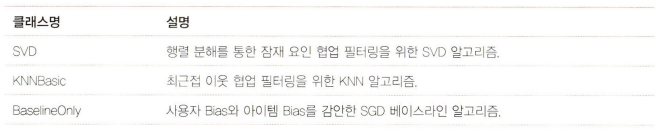

<SVD 클래스의 입력 파라미터>

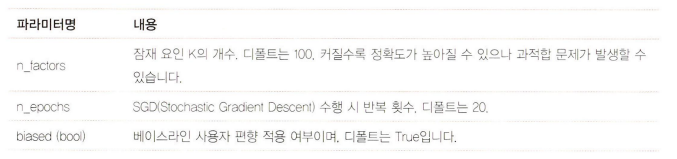

추천 알고리즘의 예측 성능 벤치마크 결과

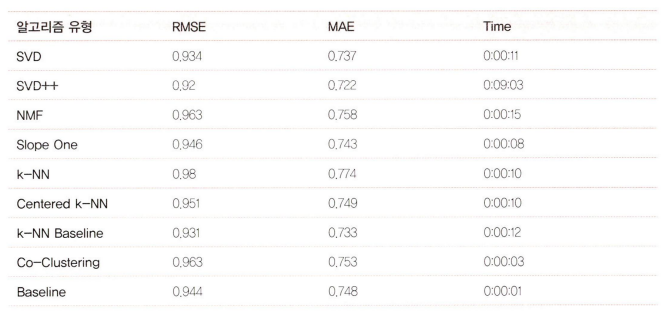

SVD++ 알고리즘의 RMSE, MAE가 가장 좋지만 시간이 너무 오래걸려 k-NN Baseline의 성능 평가 수치가 가장 좋음

#### **베이스라인 평점**

베이스라인 평점 = 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수

- 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
- 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
- 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

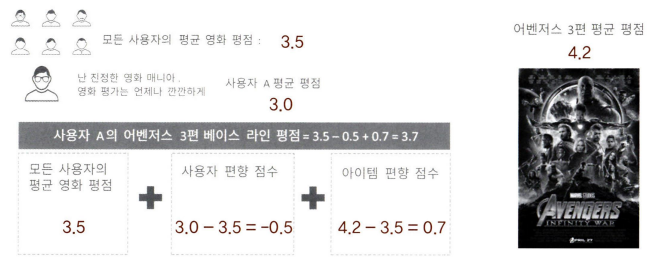

#### **교차 검증과 하이퍼 파라미터 튜닝**

In [15]:
#cross_validate()를 이용해 데이터를 5개의 학습/검증 폴드 데이터 세트로 분리해 교차 검증을 수행하고 RMSE, MAE로 성능 평가
from surprise.model_selection import cross_validate

#판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5.0))
data= Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8691  0.8747  0.8734  0.8785  0.8745  0.8740  0.0030  
MAE (testset)     0.6677  0.6721  0.6697  0.6755  0.6736  0.6717  0.0028  
Fit time          9.49    8.81    7.01    6.19    7.23    7.75    1.22    
Test time         0.48    0.16    0.30    0.17    0.28    0.28    0.12    


{'fit_time': (9.49278450012207,
  8.812163829803467,
  7.008446216583252,
  6.192284345626831,
  7.231593608856201),
 'test_mae': array([0.6677101 , 0.67213204, 0.66966523, 0.67551872, 0.67358541]),
 'test_rmse': array([0.86909898, 0.87467918, 0.8733999 , 0.87854616, 0.87449631]),
 'test_time': (0.4770164489746094,
  0.15867996215820312,
  0.30345630645751953,
  0.16968178749084473,
  0.2812995910644531)}

In [16]:
#GridSearchCV로 교차 검증을 통한 하이퍼 파라미터 최적화
from surprise.model_selection import GridSearchCV

#최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs':[20,40,60], 'n_factors':[50,100,200]}

#CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'],cv=3)
gs.fit(data)

#최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8768794169281872
{'n_epochs': 20, 'n_factors': 50}


#### **Surprise를 이용한 개인화 영화 추천 시스템 구축**

Surprise는 데이터 세트를 train_test_split()을 이용해 내부에서 사용하는 TrainSet 클래스 객체로 변환하지 않으면 fit()을 통해 학습할 수 없음

-> 데이터 세트 전체를 학습 데이터로 사용하려면 DatasetAutoFolds 클래스를 이용

In [18]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
#DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/ratings_noh.csv', reader=reader)

#전체 데이터를 학습 데이터로 생성
trainset = data_folds.build_full_trainset()

In [19]:
#아직 보지 않은 영화 목록 확인
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [21]:
#영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ml-latest-small/movies.csv')

#userId=9의 movieId 데이터를 추출해 movieID=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']

if movieIds[movieIds==42].count() == 0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [22]:
uid=str(9)
iid=str(42)

pred = algo.predict(uid,iid,verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [23]:
#사용자가 아직 평점을 매기지 않은 영화 정보를 반환
def get_unseen_surprise(ratings, movies, userId):
  #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
  seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

  #모든 영화의 movieId를 리스트로 생성
  total_movies = movies['movieId'].tolist()

  #모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:',len(unseen_movies), '전체 영화 수:',len(total_movies))

  return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


In [24]:
def recomm_movie_by_surprise(algo, userId, unseenmovies, top_n=10):

  #알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

  #predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음
  #[Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98)....]

  #이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의
  #sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행
  def sortkey_est(pred):
    return pred.est

  #sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  #top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

  top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('#### Top-10 추천 영화 리스트 ####')
for top_movie in top_movie_preds:
  print(top_movie[1],':',top_movie[2])

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
#### Top-10 추천 영화 리스트 ####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
